In [6]:
import numpy as np

street = [80, 98, 75, 91, 78]
garage = [100, 82, 105, 89, 102]

corr = np.corrcoef(street, garage)[0, 1]

print("Корреляция между автомобилями на улице и гараже:", corr)

if corr > 0:
    print("Положительная корреляция: чем больше автомобилей на уличной стоянке, тем больше их в гараже.")
elif corr < 0:
    print("Отрицательная корреляция: чем больше автомобилей на уличной стоянке, тем меньше их в гараже.")
else:
    print("Отсутствие корреляции: количество автомобилей на уличной стоянке не связано с их количеством в гараже.")

Корреляция между автомобилями на улице и гараже: -0.9999999999999998
Отрицательная корреляция: чем больше автомобилей на уличной стоянке, тем меньше их в гараже.


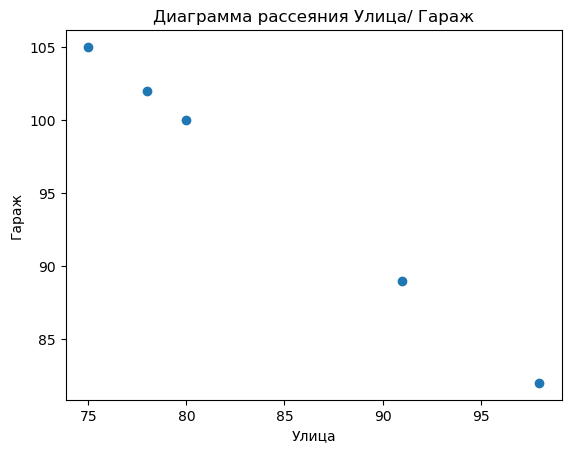

In [88]:
import matplotlib.pyplot as plt

street = [80, 98, 75, 91, 78]
garage = [100, 82, 105, 89, 102]

plt.scatter(street, garage)
plt.xlabel("Улица")
plt.ylabel("Гараж")
plt.title("Диаграмма рассеяния Улица/ Гараж")
plt.show()

               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      1.515695  13270.422265  
std       1.104885  12110.011237  
min       0.000000   1121.873900  
25%       1.000000   4740.287150  
50%       2.000000   9382.033000  
75%       2.000000  16639.912515  
max       3.000000  63770.428010  

Наиболее коррелир

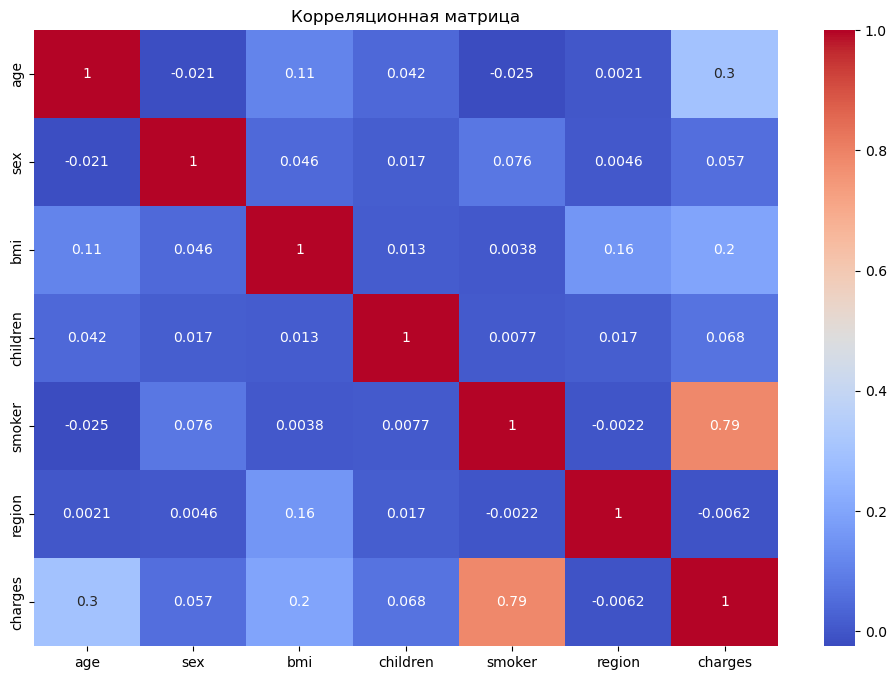

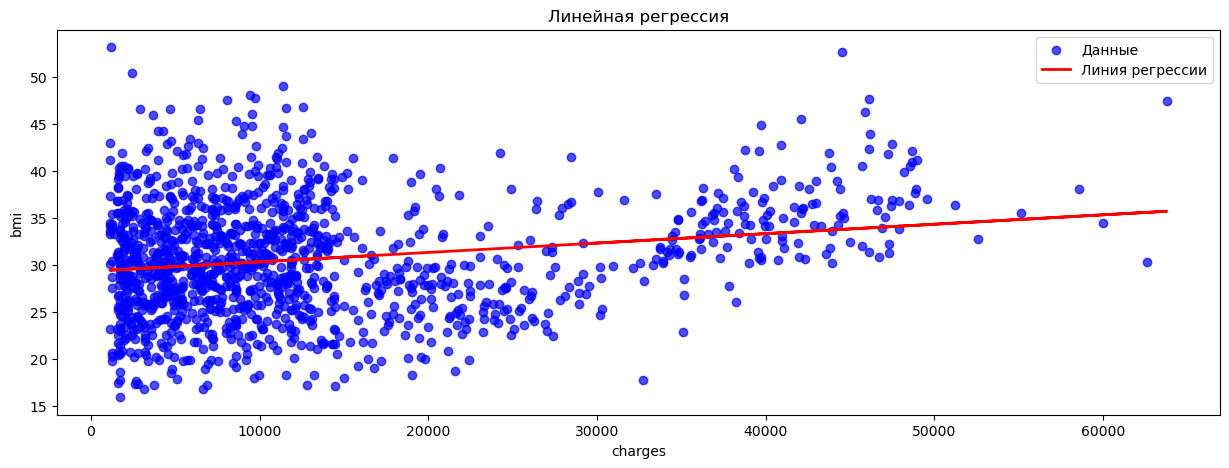

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2. Загрузка данных
data = pd.read_csv('insurance.csv')

# Предобработка данных
data.dropna(inplace=True) # Удаление строк с пропущенными значениями
data['sex'] = data['sex'].map({'female': 0, 'male': 1}) # Замена текстовых значений на числовые
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data['region'] = data['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3})

# Описание признаков
description = data.describe()
print(description)

# 2.1 Построение корреляционной матрицы
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')

# Выбор наиболее коррелирующей переменной
target_variable = 'bmi'
most_correlated_variable = correlation_matrix[target_variable].drop(target_variable).idxmax()
print(f'\nНаиболее коррелирующая переменная: {most_correlated_variable}')

# 2.2 Реализоция линейной регрессии вручную
X = data[most_correlated_variable].values.reshape(-1, 1)
y = data[target_variable].values

model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
mse = mean_squared_error(y, model.predict(X))

# Вывод наклона, сдвига и MSE
print(f'\nНаклон: {slope}')
print(f'Сдвиг: {intercept}')
print(f'Cреднее квадратичное отклонение (MSE): {mse}')

# 2.3 Визуализация регрессии
plt.figure(figsize=(15, 5))
plt.scatter(X, y, color='blue', label='Данные', alpha=0.7)
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Линия регрессии')
plt.xlabel(most_correlated_variable)
plt.ylabel(target_variable)
plt.legend()
plt.title('Линейная регрессия')
plt.show()

Пропущенные значения:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Уникальные регионы:
 ['southwest' 'southeast' 'northwest' 'northeast']

Однофакторный ANOVA тест с использованием библиотеки Scipy:
F-значение: 39.49505720170283
p-значение: 1.881838913929143e-24

Однофакторный ANOVA тест с использованием функции anova_lm() из библиотеки statsmodels:
               df        sum_sq      mean_sq          F        PR(>F)
C(region)     3.0   4055.880631  1351.960210  39.495057  1.881839e-24
Residual   1334.0  45664.319755    34.231124        NaN           NaN

Перебор всех пар регионов с использованием t-критерия Стьюдента и определение поправки Бонферрони:

Сравнение региона 0 и региона 1
t-значение: -5.908373821545118
p-значение: 5.4374009639680636e-09

Сравнение региона 0 и региона 2
t-значение: 3.2844171500398582
p-значение: 0.001076958496307695

Сравнение региона 0 и региона 3
t-значение: 3.1169000930045923
p-значение

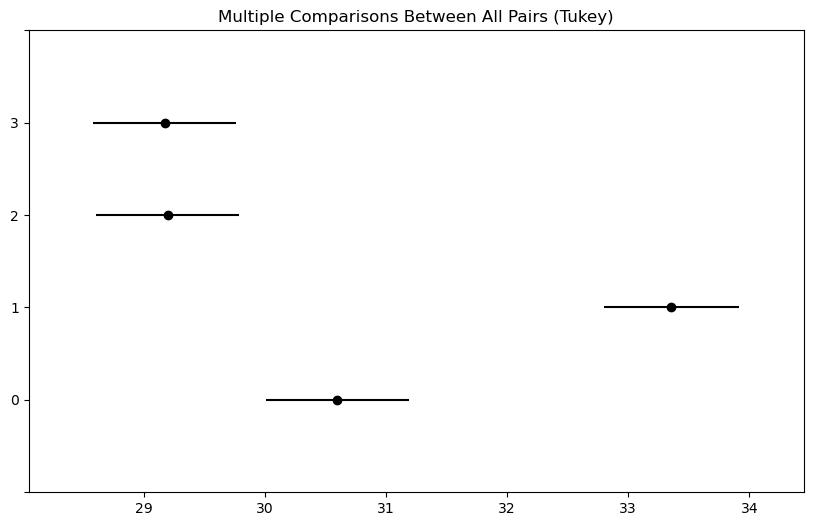


Двухфакторный ANOVA тест с использованием функции anova_lm() из библиотеки statsmodels:
              df        sum_sq      mean_sq          F        PR(>F)
region       3.0   4055.880631  1351.960210  39.539923  1.773031e-24
sex          1.0     86.007035    86.007035   2.515393  1.129767e-01
Residual  1333.0  45578.312720    34.192283        NaN           NaN

Пост-хок тест Тьюки и построение графика:


group1,group2,meandiff,p-adj,lower,upper,reject
northeast / female,northeast / male,-0.2998,0.9998,-2.2706,1.6711,False
northeast / female,northwest / female,-0.0464,1.0,-2.0142,1.9215,False
northeast / female,northwest / male,-0.2042,1.0,-2.1811,1.7728,False
northeast / female,southeast / female,3.3469,0.0,1.41,5.2839,True
northeast / female,southeast / male,4.6657,0.0,2.7634,6.568,True
northeast / female,southwest / female,0.7362,0.9497,-1.2377,2.71,False
northeast / female,southwest / male,1.8051,0.1007,-0.1657,3.776,False
northeast / male,northwest / female,0.2534,0.9999,-1.7083,2.2152,False
northeast / male,northwest / male,0.0956,1.0,-1.8752,2.0665,False
northeast / male,southeast / female,3.6467,0.0,1.7159,5.5775,True


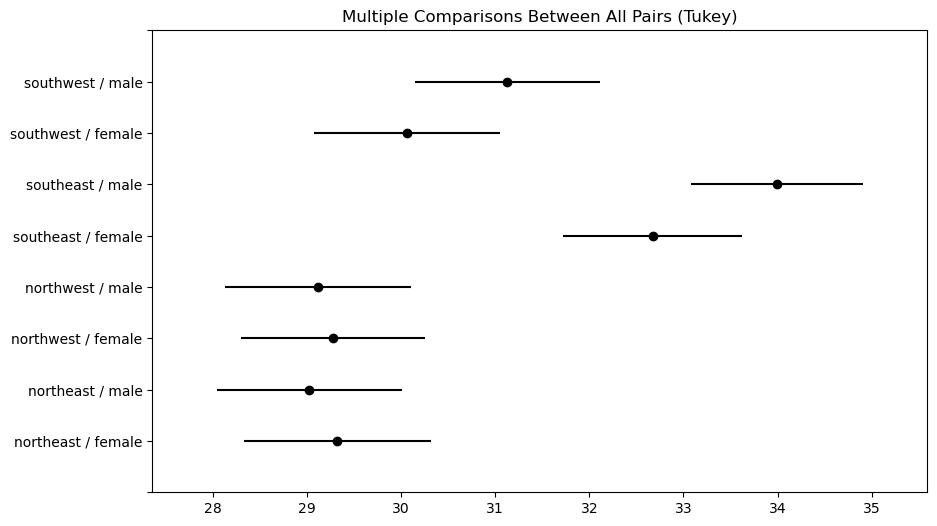

In [93]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 3. Загружаем данные:
data = pd.read_csv('insurance.csv')

# Проверяем наличие пропущенных значений
print("Пропущенные значения:\n", data.isnull().sum())

# Выводим список уникальных регионов:
unique_regions = data['region'].unique()
print("\nУникальные регионы:\n", unique_regions)

# Преобразуем строковые значения в числовые
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data['region'] = data['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})


# 3.1. Однофакторный ANOVA тест с использованием библиотеки Scipy
f_statistic, p_value = stats.f_oneway(data[data['region'] == 0]['bmi'],
                                      data[data['region'] == 1]['bmi'],
                                      data[data['region'] == 2]['bmi'],
                                      data[data['region'] == 3]['bmi'])
print("\nОднофакторный ANOVA тест с использованием библиотеки Scipy:") 
print("F-значение:", f_statistic)
print("p-значение:", p_value)


# 3.2. Однофакторный ANOVA тест с использованием функции anova_lm() из библиотеки statsmodels
model = ols('bmi ~ C(region)', data=data).fit()
table = anova_lm(model)
print("\nОднофакторный ANOVA тест с использованием функции anova_lm() из библиотеки statsmodels:") 
print(table)


# 3.3. Перебор всех пар регионов с использованием t-критерия Стьюдента и определение поправки Бонферрони
regions_pairs = data['region'].unique()
bonferroni_correction = 0.05 / (len(regions_pairs) * (len(regions_pairs) - 1) / 2)

print("\nПеребор всех пар регионов с использованием t-критерия Стьюдента и определение поправки Бонферрони:")

for i in range(len(regions_pairs)):
    for j in range(i + 1, len(regions_pairs)):
        region_i = regions_pairs[i]
        region_j = regions_pairs[j]
        t_statistic, p_value = stats.ttest_ind(data[data['region'] == region_i]['bmi'],
                                               data[data['region'] == region_j]['bmi'])
        if p_value < bonferroni_correction:
            print("\nСравнение региона", region_i, "и региона", region_j)
            print("t-значение:", t_statistic)
            print("p-значение:", p_value)


# 3.4. Пост-хок тест Тьюки и построение графика
print("\nПост-хок тест Тьюки и построение графика:")

tukey_result_1 = pairwise_tukeyhsd(data['bmi'], data['region'])
print(tukey_result_1)
tukey_result_1.plot_simultaneous()
plt.show()


# 3.5. Двухфакторный ANOVA тест с использованием функции anova_lm() из библиотеки statsmodels
print("\nДвухфакторный ANOVA тест с использованием функции anova_lm() из библиотеки statsmodels:")

model = ols('bmi ~ region + sex', data=df).fit()
anova_result = sm.stats.anova_lm(model)
print(anova_result)


# 3.6. Пост-хок тест Тьюки и построение графика
print("\nПост-хок тест Тьюки и построение графика:")

df['combination'] = df.region + " / " + df.sex
tukey_result_2 = pairwise_tukeyhsd(endog = df['bmi'], groups = df['combination'])
tukey_result_2.plot_simultaneous()
tukey.summary()